In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\obaer\\Documents\\python\\Mastering-Python-Data-Analysis-master'

In [4]:
#Comando opcional del autor, para seleccionar stylesheet mystyle.mplstyle
plt.style.use(os.path.join('C:\\Users\\obaer\\Documents\\python\\Mastering-Python-Data-Analysis-master\\Appendix', 'mystyle.mplstyle'))

In [5]:
os.getcwd()

'C:\\Users\\obaer\\Documents\\python\\Mastering-Python-Data-Analysis-master'

In [6]:
os.chdir('C:\\Users\\obaer\\Documents\\python\\Mastering-Python-Data-Analysis-master\\Chapter 1')

In [7]:
os.getcwd()

'C:\\Users\\obaer\\Documents\\python\\Mastering-Python-Data-Analysis-master\\Chapter 1'

In [8]:
cols =['user id', 'item id', 'rating', 'timestamp']

In [9]:
for g in os.listdir():
    print(g)

.DS_Store
._.DS_Store
._B03551_01_code.ipynb
._data
._mystyle.mplstyle
B03551_01_code.ipynb
data
mystyle.mplstyle


In [10]:
ratings = pd.read_csv(os.path.join('C:\\Users\\obaer\\Documents\\python\\Mastering-Python-Data-Analysis-master\\Chapter 1\\data', 'ratings.dat'), sep='::', index_col = False, names = cols, encoding='UTF-8')

<ipython-input-10-166cfbd93b39>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv(os.path.join('C:\\Users\\obaer\\Documents\\python\\Mastering-Python-Data-Analysis-master\\Chapter 1\\data', 'ratings.dat'), sep='::', index_col = False, names = cols, encoding='UTF-8')


In [11]:
ratings.head()

,user id,item id,rating,timestamp
0,1,1074638,7,1365029107
1,1,1853728,8,1366576639
2,2,104257,8,1364690142
3,2,1259521,8,1364118447
4,2,1991245,7,1364117717


In [12]:
ratings[:5] #Es lo mismo que ratings.head(),solo usando slicing

,user id,item id,rating,timestamp
0,1,1074638,7,1365029107
1,1,1853728,8,1366576639
2,2,104257,8,1364690142
3,2,1259521,8,1364118447
4,2,1991245,7,1364117717


In [13]:
rating_counts = ratings['rating'].value_counts() #guardando los conteos de cada valor de rating en la variable "rating_counts"
rating_counts
#Es de esperarse que los ratings vayan de 1 a 10, por lo que tiene sentido usar value_counts()

8     12012
7     11063
9      7119
6      6373
10     6281
5      3399
4      1696
3       924
1       595
2       533
0         5
Name: rating, dtype: int64

In [14]:
#Ordenando las filas de acuerdo con el rating, mediante la función sort_index():
sorted_counts = rating_counts.sort_index()
sorted_counts

0         5
1       595
2       533
3       924
4      1696
5      3399
6      6373
7     11063
8     12012
9      7119
10     6281
Name: rating, dtype: int64

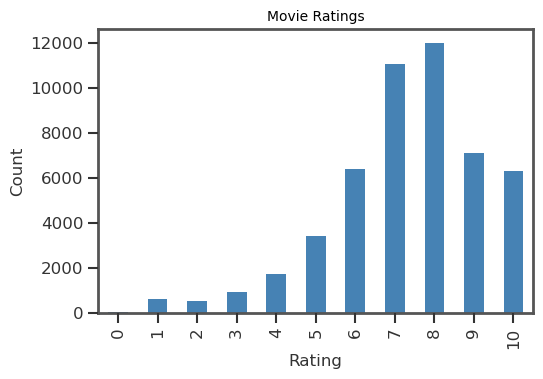

In [15]:
sorted_counts.plot(kind = 'bar', color = 'SteelBlue')
plt.title('Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

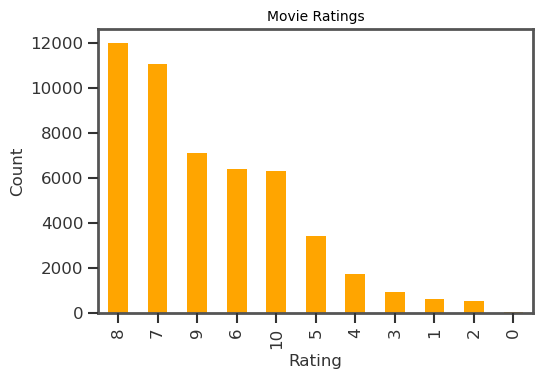

In [16]:
rating_counts.plot(kind = 'bar', color = 'Orange')
plt.title('Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()
#Mostrando la diferencia: se grafica a continuación el objeto sin ordenar por valor de rating.

In [17]:
##Para hacer una referencia cruzada entre la información de ratings y los géneros de películas, primero
#debe abrirse el archivo "movies.dat"

In [18]:
os.getcwd()

'C:\\Users\\obaer\\Documents\\python\\Mastering-Python-Data-Analysis-master\\Chapter 1'

In [19]:
cols2 = ['movie id', 'movie title', 'genre']
movies = pd.read_csv(os.path.join('C:\\Users\\obaer\\Documents\\python\\Mastering-Python-Data-Analysis-master\\Chapter 1\\data', 'movies.dat'), sep = '::', index_col = False, names = cols2, encoding = 'UTF-8')

<ipython-input-19-cc130a411564>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv(os.path.join('C:\\Users\\obaer\\Documents\\python\\Mastering-Python-Data-Analysis-master\\Chapter 1\\data', 'movies.dat'), sep = '::', index_col = False, names = cols2, encoding = 'UTF-8')


In [20]:
movies.head()

,movie id,movie title,genre
0,2844,Fantômas - À l'ombre de la guillotine (1913),Crime|Drama
1,4936,The Bank (1915),Comedy|Short
2,7264,The Rink (1916),Comedy|Short
3,8133,The Immigrant (1917),Short|Comedy|Drama|Romance
4,9968,Broken Blossoms or The Yellow Man and the Girl...,Drama|Romance


In [21]:
#for x in movies['movie title']:
#    print(x)
import time

In [22]:
is_drama = movies['genre'] == 'Crime|Drama'
is_drama.head()
#Querying system whether movie genre equals crime/drama, output is series object with Boolean values

0     True
1    False
2    False
3    False
4    False
Name: genre, dtype: bool

In [23]:
drama2 = movies[movies['genre'] == 'Crime|Drama']
drama2.head()

#calling cells in "movies" dataframe for which the condition is True

,movie id,movie title,genre
0,2844,Fantômas - À l'ombre de la guillotine (1913),Crime|Drama
54,23817,Blondie Johnson (1933),Crime|Drama
208,40522,Ladri di biciclette (1948),Crime|Drama
236,42876,Rashômon (1950),Crime|Drama
251,44515,Cosh Boy (1953),Crime|Drama


In [24]:
drama_ids = drama2['movie id']
drama_ids.head()

0       2844
54     23817
208    40522
236    42876
251    44515
Name: movie id, dtype: int64

In [25]:
criterion = ratings['item id'].map(lambda x:(drama_ids==x).any())

#The criterion variable is produced via de map() method - applying a functon to all the entities of a Series object. 
#The lambda function within the map method checks whether an item appears in drama_ids, returning True in positive cases.


In [26]:
criterion[:5]

0    False
1    False
2    False
3    False
4    False
Name: item id, dtype: bool

In [27]:
drama_ratings = ratings[criterion]
drama_ratings.head()

,user id,item id,rating,timestamp
128,18,86066,10,1363985505
150,23,1212450,8,1364166586
176,26,1817273,8,1367761386
194,36,68646,9,1364834910
195,36,71562,10,1365005772


In [28]:
criterion[:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: item id, dtype: bool

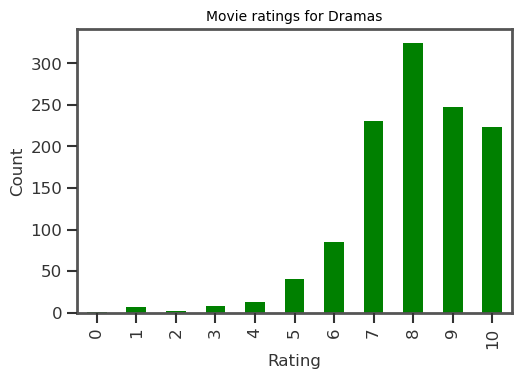

In [29]:
rating_counts = drama_ratings['rating'].value_counts()
sorted_counts = rating_counts.sort_index()
#plotting  drama counts sorted by rating
sorted_counts.plot(kind = 'bar', color = 'Green')
plt.title('Movie ratings for Dramas')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [30]:
#*******MY TINKERING********
moviesRating = pd.concat([movies, ratings], axis=1)
#Concatenating movies and ratings dataframes

In [31]:
moviesRating.head()

,movie id,movie title,genre,user id,item id,rating,timestamp
0,2844.0,Fantômas - À l'ombre de la guillotine (1913),Crime|Drama,1,1074638,7,1365029107
1,4936.0,The Bank (1915),Comedy|Short,1,1853728,8,1366576639
2,7264.0,The Rink (1916),Comedy|Short,2,104257,8,1364690142
3,8133.0,The Immigrant (1917),Short|Comedy|Drama|Romance,2,1259521,8,1364118447
4,9968.0,Broken Blossoms or The Yellow Man and the Girl...,Drama|Romance,2,1991245,7,1364117717


In [32]:
moviesRating[moviesRating['genre'] == 'Crime|Drama'].head()

,movie id,movie title,genre,user id,item id,rating,timestamp
0,2844.0,Fantômas - À l'ombre de la guillotine (1913),Crime|Drama,1,1074638,7,1365029107
54,23817.0,Blondie Johnson (1933),Crime|Drama,14,59578,9,1366185297
208,40522.0,Ladri di biciclette (1948),Crime|Drama,38,39694,6,1364270301
236,42876.0,Rashômon (1950),Crime|Drama,43,2125435,2,1363718313
251,44515.0,Cosh Boy (1953),Crime|Drama,45,1772424,8,1368852402


In [33]:
moviesRating[moviesRating['genre'] == 'Comedy|Short'].head()
#Since the head() function outputs the first 10 items, we can deduct that only three movies fall in the 
#Comedy/short category

,movie id,movie title,genre,user id,item id,rating,timestamp
1,4936.0,The Bank (1915),Comedy|Short,1,1853728,8,1366576639
2,7264.0,The Rink (1916),Comedy|Short,2,104257,8,1364690142
3506,359715.0,My Best Friend's Birthday (1987),Comedy|Short,779,450259,9,1365557265


In [34]:
#moviesRating.loc[0] #First item (row) in dataframe

In [37]:
moviesRating.loc[0:10, ['movie title', 'genre']]

,movie title,genre
0,Fantômas - À l'ombre de la guillotine (1913),Crime|Drama
1,The Bank (1915),Comedy|Short
2,The Rink (1916),Comedy|Short
3,The Immigrant (1917),Short|Comedy|Drama|Romance
4,Broken Blossoms or The Yellow Man and the Girl...,Drama|Romance
5,The Son of Tarzan (1920),Action|Adventure
6,The Kid (1921),Comedy|Drama|Family
7,"Dr. Mabuse, der Spieler - Ein Bild der Zeit (1...",Crime|Mystery|Thriller
8,Nanook of the North (1922),Documentary
9,"Nosferatu, eine Symphonie des Grauens (1922)",Horror
